In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('./Kaggle_Struggle_data/train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

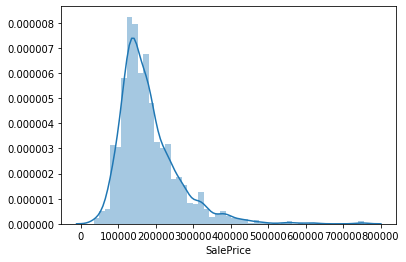

In [5]:
sns.distplot(df_train['SalePrice'])

In [6]:
print('Skewness: %f' % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


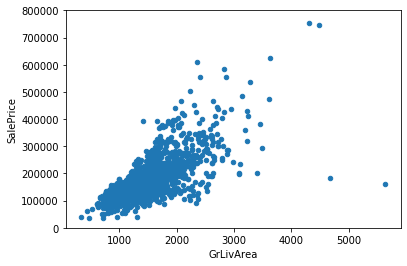

In [7]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x=var, y = 'SalePrice', ylim = (0, 800000))

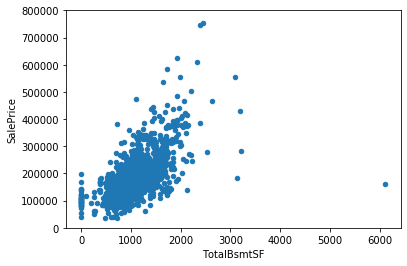

In [8]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0, 800000)

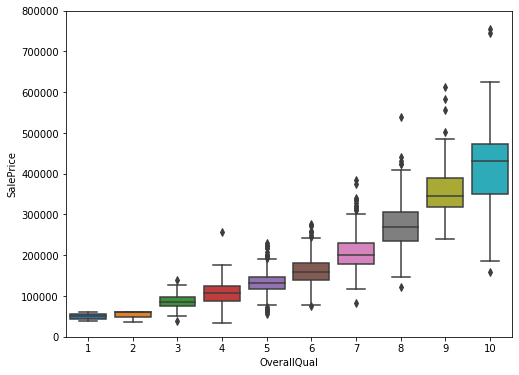

In [9]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

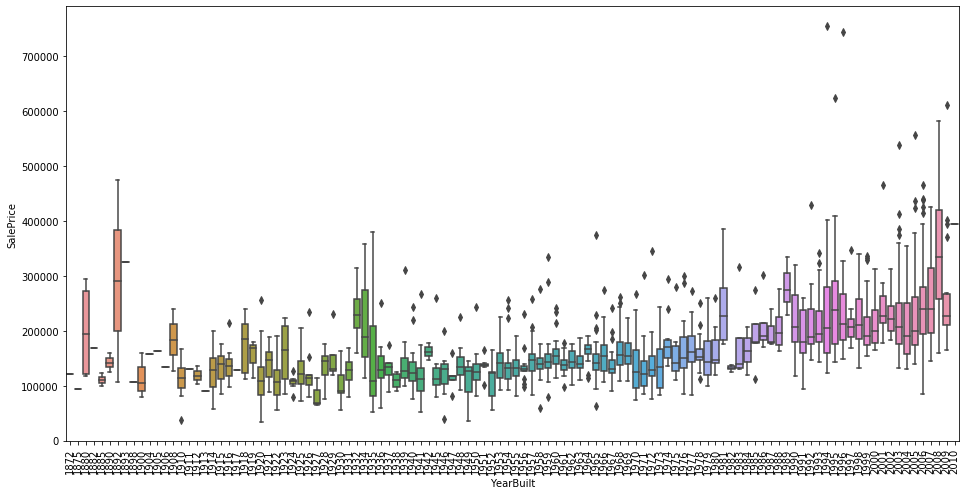

In [10]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
f, ax = plt.subplots(figsize = (16,8))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
plt.xticks(rotation = 90)

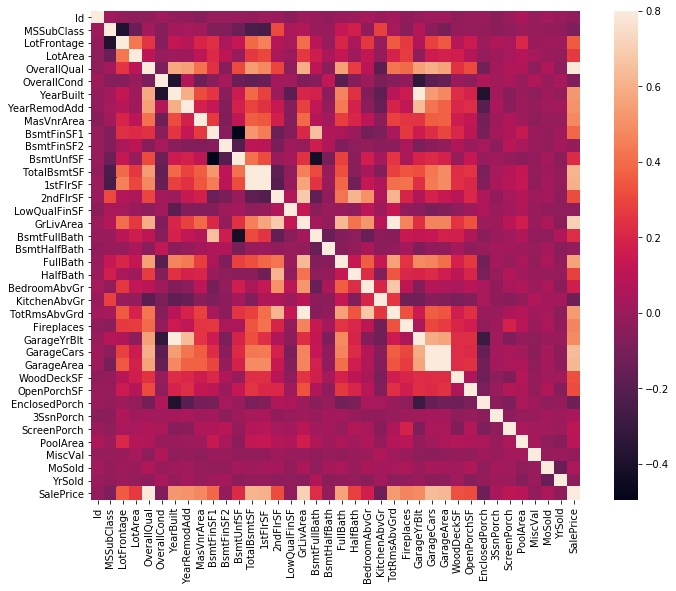

In [11]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax= .8, square = True)

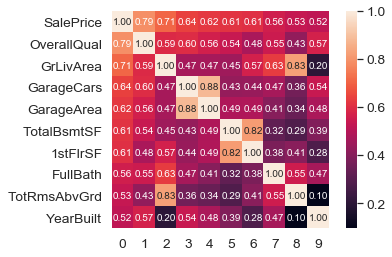

In [12]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws={'size':10}, yticklabels = cols.values)
plt.show()

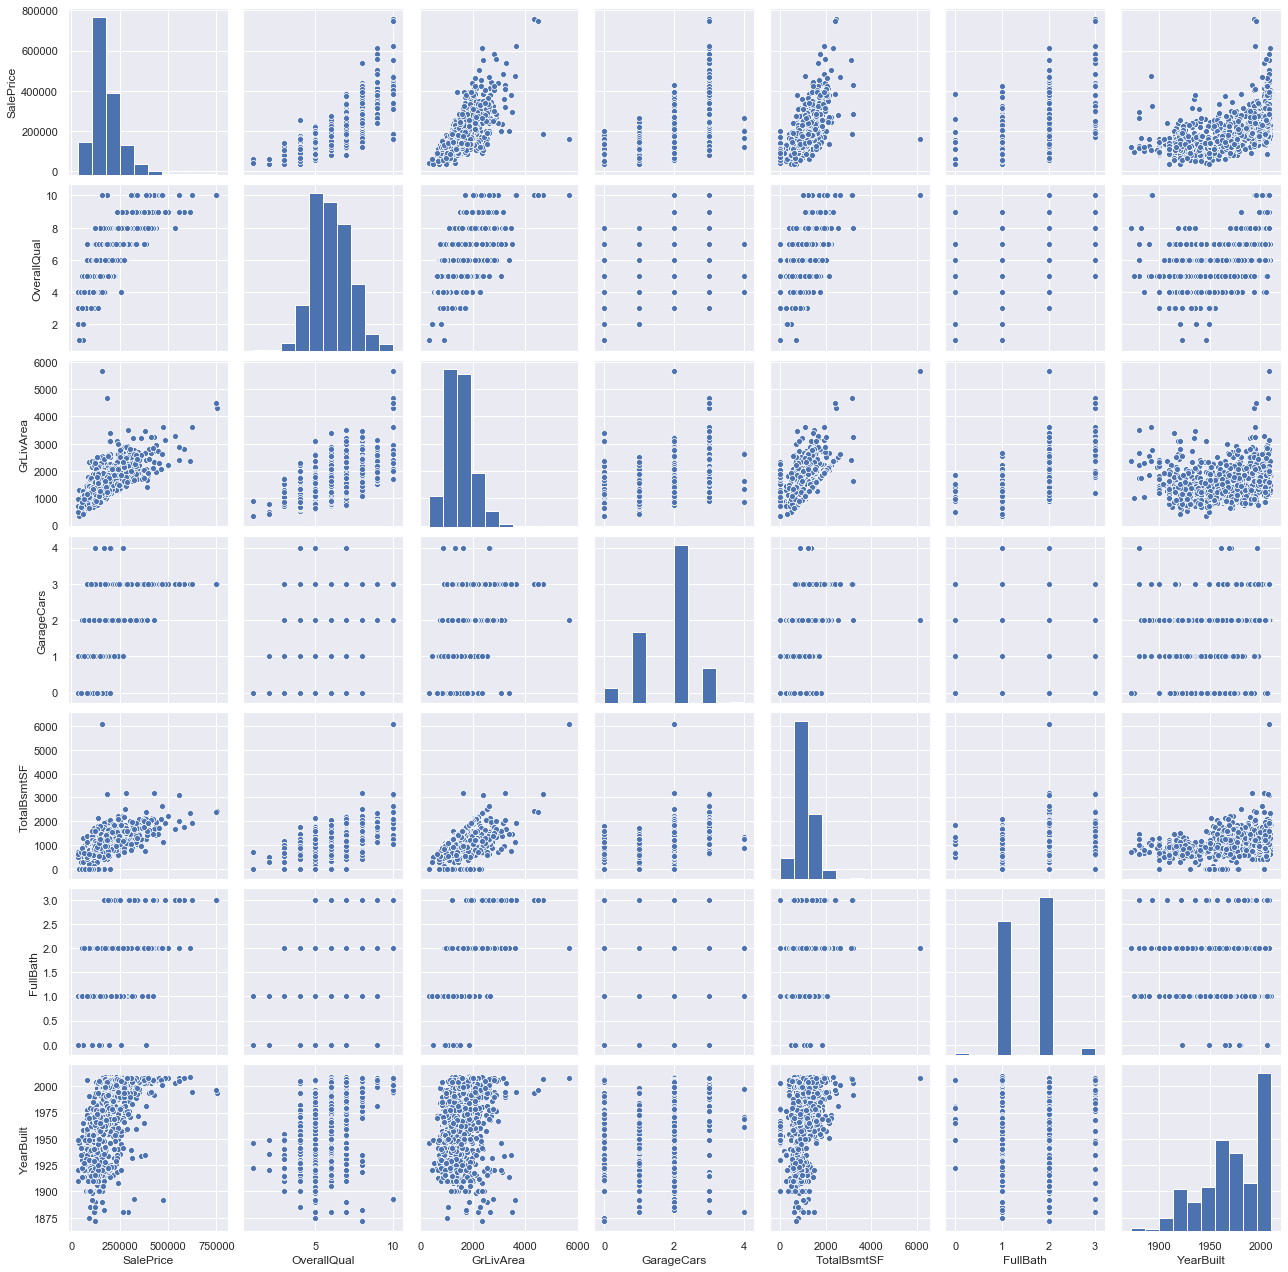

In [13]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

In [14]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum())/(df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'percent'])
missing_data.head(20)

,Total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [15]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [18]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


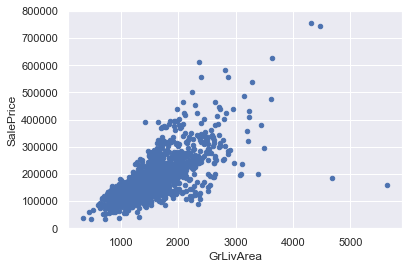

In [20]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim=(0, 800000));

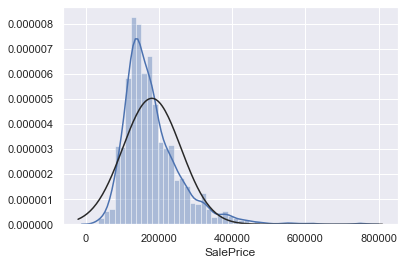

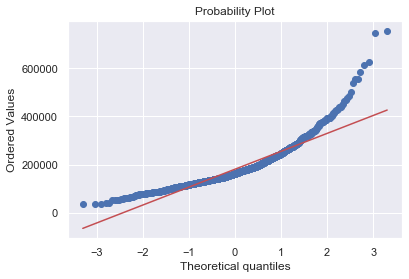

In [21]:
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

In [22]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

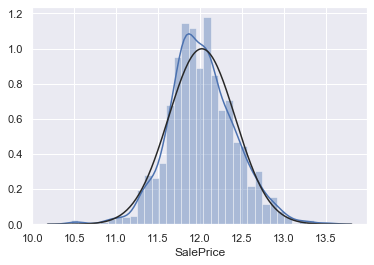

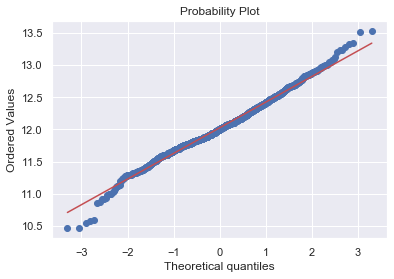

In [23]:
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

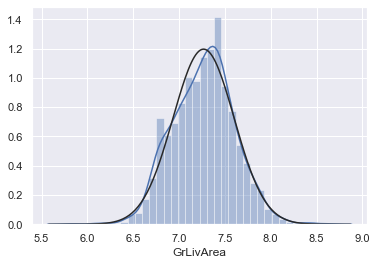

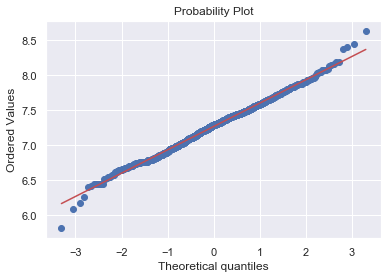

In [25]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

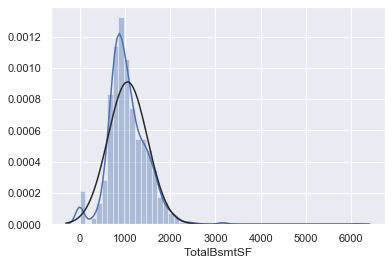

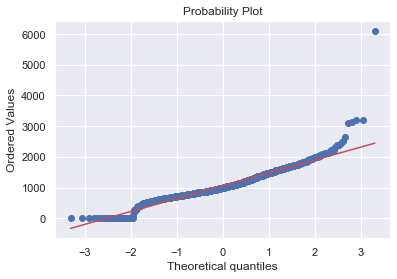

In [26]:
sns.distplot(df_train['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

In [27]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)
df_train['HasBmt'] = 0
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [28]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

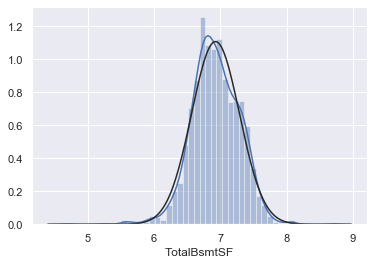

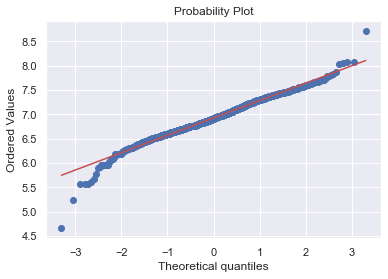

In [29]:
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] >0]['TotalBsmtSF'], plot = plt)

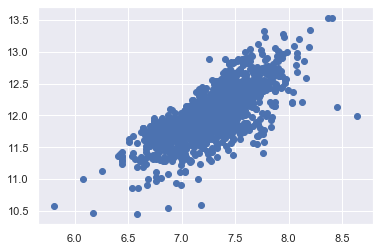

In [30]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

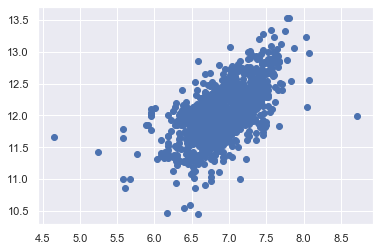

In [35]:
plt.scatter(df_train[df_train['TotalBsmtSF'] >0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF'] >0]['SalePrice'])

In [36]:
df_train = pd.get_dummies(df_train)

In [37]:
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [42]:
x = df_train.drop('SalePrice', axis = 1)
y = df_train['SalePrice']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 42)
print(X_train, X_test, y_train, y_test)

        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
135    136          20    10400            7            6       1970   
1452  1453         180     3675            5            5       2005   
1046  1047          60    16056            9            5       2005   
691    692          60    21535           10            6       1994   
435    436          60    10667            7            6       1996   
...    ...         ...      ...          ...          ...        ...   
1095  1096          20     9317            6            5       2006   
1130  1131          50     7804            4            3       1928   
1294  1295          20     8172            5            7       1955   
860    861          50     7642            7            8       1918   
1126  1127         120     3684            7            5       2007   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
135           1970           0           0       1304  ..

In [48]:
X_test.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.00000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000
mean,734.452055,54.817352,10283.906393,6.045662,5.652968,1970.294521,1985.038813,431.86758,53.662100,555.269406,...,0.006849,0.075342,0.004566,0.872146,0.073059,0.0,0.013699,0.009132,0.824201,0.079909
std,417.493903,40.904683,7507.014372,1.427971,1.145333,29.801441,20.300282,435.28748,174.792626,434.426059,...,0.082571,0.264245,0.067496,0.334309,0.260531,0.0,0.116370,0.095235,0.381084,0.271462
min,11.000000,20.000000,1491.000000,2.000000,2.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,364.500000,20.000000,7715.250000,5.000000,5.000000,1954.000000,1969.000000,0.00000,0.000000,222.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,729.500000,50.000000,9253.500000,6.000000,5.000000,1972.000000,1993.000000,378.50000,0.000000,464.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,1098.000000,60.000000,11489.250000,7.000000,6.000000,1998.000000,2003.000000,677.00000,0.000000,795.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1457.000000,190.000000,115149.000000,10.000000,9.000000,2009.000000,2010.000000,2096.00000,1474.000000,2153.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [49]:
X_train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,728.168462,57.766895,10617.515181,6.123408,5.542605,1971.651322,1984.769833,449.124388,43.543585,572.555338,...,0.001959,0.087169,0.000979,0.865818,0.067581,0.003918,0.005877,0.015671,0.818805,0.088149
std,423.270063,42.889033,10877.745202,1.363549,1.097857,30.374136,20.799531,464.863749,155.247763,445.308946,...,0.044237,0.282221,0.031296,0.341015,0.251148,0.062500,0.076471,0.124260,0.385368,0.283650
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,367.000000,20.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.000000,50.000000,9571.000000,6.000000,5.000000,1973.000000,1994.000000,386.000000,0.000000,483.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1091.000000,70.000000,11645.000000,7.000000,6.000000,2001.000000,2004.000000,733.000000,0.000000,811.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1127.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
rf = RandomForestRegressor(random_state = 42, n_estimators = 10, max_features = 0.33, min_samples_split = 20)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(y_pred)

error_ = y_pred - y_test

print(f'RMSE: {np.sqrt(np.mean(error_**2))}')

[11.39424491 11.95332973 11.71640628 11.98806221 11.39824167 11.35159243
 12.24206338 12.14766791 12.59133332 12.03290612 11.89277506 12.17769357
 12.11534377 12.2395634  12.31473855 11.91852288 12.20240983 11.73156122
 11.69892154 12.29188437 11.97412361 12.32526771 11.61398294 12.11196172
 12.20703484 12.06932946 12.13682333 11.66195994 12.10710247 11.89878348
 11.68544661 12.43261481 12.12370571 11.61843949 11.75324967 12.20334361
 11.74934302 12.26104289 11.8901181  11.65164693 11.78926132 12.31506025
 11.25610565 12.87933009 12.82639794 11.93460491 11.55529982 11.77339953
 12.83194977 12.06846845 12.15303318 11.43390729 11.79386257 11.95086098
 11.95242565 12.41742197 12.07244496 12.03816409 11.72032051 11.63608238
 11.34344984 12.15760619 12.53252945 12.37389832 12.41357917 12.26210674
 11.68034518 12.65673059 12.1872861  12.08803823 12.58982566 11.9510534
 11.637304   11.57615438 12.1706148  12.54327768 11.86469367 11.79424547
 11.87496785 11.68937137 11.50813568 11.45029723 11.

In [58]:
from sklearn.model_selection import cross_val_score,GridSearchCV

clf_score = cross_val_score(rf, X_train, y_train, cv = 5)
print(clf_score)
clf_score.mean()

[0.84647237 0.77570312 0.8213262  0.84515786 0.87537749]


0.8328074058211993

In [63]:
regressor = RandomForestRegressor(random_state = 42)
parameters = [{'n_estimators' : [100, 200], 'max_features' : [0.33], 'min_samples_split' : [2,5,10,20]}]
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters, cv = 5, verbose = 2)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters, best_accuracy)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] max_features=0.33, min_samples_split=2, n_estimators=100 ........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=0.33, min_samples_split=2, n_estimators=100, total=   0.8s
[CV] max_features=0.33, min_samples_split=2, n_estimators=100 ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_features=0.33, min_samples_split=2, n_estimators=100, total=   0.6s
[CV] max_features=0.33, min_samples_split=2, n_estimators=100 ........
[CV]  max_features=0.33, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_features=0.33, min_samples_split=2, n_estimators=100 ........
[CV]  max_features=0.33, min_samples_split=2, n_estimators=100, total=   0.6s
[CV] max_features=0.33, min_samples_split=2, n_estimators=100 ........
[CV]  max_features=0.33, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_features=0.33, min_samples_split=2, n_estimators=200 ........
[CV]  max_features=0.33, min_samples_split=2, n_estimators=200, total=   1.1s
[CV] max_features=0.33, min_samples_split=2, n_estimators=200 ........
[CV]  max_features=0.33, min_samples_split=2, n_estimators=200, total=   1.2s
[CV] max_features=0.33, min_samples_split=2, n_estimators=200 ........
[CV]  max_features=0.33, min_samples_split=2, n_estimators=200, total=   1.1s
[CV] max_features=0.33, min_

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   27.9s finished


{'max_features': 0.33, 'min_samples_split': 2, 'n_estimators': 200} 0.8613655586756768


In [64]:
rf_final = RandomForestRegressor(random_state = 42, n_estimators = 200, max_features = 0.33, min_samples_split = 2)
rf_final.fit(X_train, y_train)

y_pred_final = rf_final.predict(X_test)

print(y_pred_final)

error_final = y_pred_final - y_test

print(f'RMSE: {np.sqrt(np.mean(error_final**2))}')

[11.31866609 11.84424952 11.63404878 11.8922403  11.40086372 11.32114838
 12.25960041 12.3746703  12.51401186 11.97854562 11.93133247 12.16575414
 12.15103001 12.23128433 12.32874835 12.03320101 12.19946772 11.73512602
 11.7196408  12.27724114 12.01388256 12.28636693 11.66269931 12.11573345
 12.23453324 12.06667041 12.16037761 11.57926506 12.08621918 11.86041186
 11.71974945 12.49604033 12.14961554 11.61511531 11.78347651 12.17709926
 11.70487566 12.24234884 11.87380232 11.6178672  11.72143214 12.33269333
 11.19076043 12.86393249 12.73201485 11.93984142 11.58770497 11.75225842
 12.92831597 12.06772005 12.26351672 11.47536095 11.68597813 11.98487512
 11.98340132 12.43331405 12.0874971  12.10098329 11.68724907 11.62712129
 11.25572103 12.13243733 12.60868421 12.35943768 12.38114175 12.22280171
 11.61753202 12.65892394 12.16025242 12.03535793 12.64410232 11.87214822
 11.63877875 11.50419099 12.18801089 12.59773405 11.84113726 11.81260017
 11.81393831 11.70552565 11.53574349 11.50042849 11

In [65]:
clf_score = cross_val_score(rf_final, X_train, y_train, cv = 5)
print(clf_score)
clf_score.mean()

[0.87097974 0.80515033 0.8549299  0.88133642 0.89443141]


0.8613655586756768

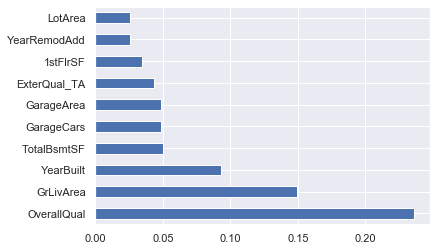

In [69]:
cols = X_train.columns
feat_imp = pd.Series(data = rf_final.feature_importances_, index = cols).sort_values(ascending = False).head(10)
feat_imp

feat_imp.plot.barh()